In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [27]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [28]:
# Create a KNN classifier with random state 0 and default train test ratio
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
# Evaluate the classifier using confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[47  6]
 [ 1 89]]


In [30]:
# Evaluate the classifier using ROC curve
y_score = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.9821802935010483


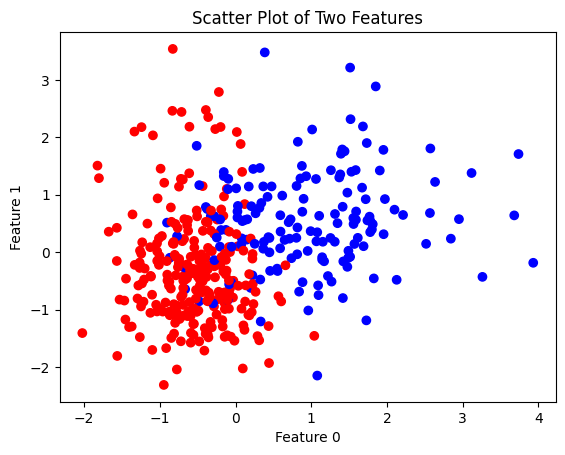

In [31]:
# Visualize the classifier using scatter plot and histogram
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of Two Features')
plt.show()

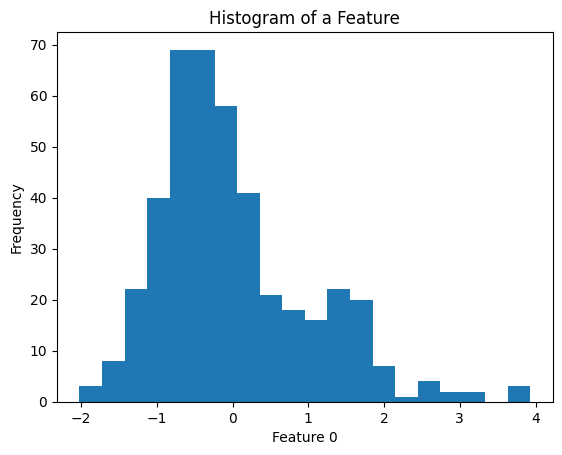

In [32]:
plt.hist(X_train[:, 0], bins=20)
plt.xlabel('Feature 0')
plt.ylabel('Frequency')
plt.title('Histogram of a Feature')
plt.show()

In [33]:
# Analyze the classifier for each train test ratio
train_test_ratios = [0.7, 0.8, 0.6]
for ratio in train_test_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    npv = tn / (tn + fn)
    fdr = fp / (fp + tp)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    mcc = (tp*tn - fp*fn) / np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print("Train-Test Ratio:", ratio)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("False Positive Rate:", fpr)
    print("False Negative Rate:", fnr)
    print("Negative Predictive Value:", npv)
    print("False Discovery Rate:", fdr)
    print("F1-Score:", f1_score)
    print("Matthews Correlation Coefficient:", mcc)
    print("\t")

Train-Test Ratio: 0.7
Specificity: 0.8904109589041096
Sensitivity: 0.9841897233201581
Accuracy: 0.949874686716792
Precision: 0.939622641509434
False Positive Rate: 0.1095890410958904
False Negative Rate: 0.015810276679841896
Negative Predictive Value: 0.9701492537313433
False Discovery Rate: 0.06037735849056604
F1-Score: 0.9613899613899612
Matthews Correlation Coefficient: 0.892012959685031
	
Train-Test Ratio: 0.8
Specificity: 0.8402366863905325
Sensitivity: 0.9860627177700348
Accuracy: 0.9320175438596491
Precision: 0.9129032258064517
False Positive Rate: 0.15976331360946747
False Negative Rate: 0.013937282229965157
Negative Predictive Value: 0.9726027397260274
False Discovery Rate: 0.08709677419354839
F1-Score: 0.9480737018425461
Matthews Correlation Coefficient: 0.8553905842947509
	
Train-Test Ratio: 0.6
Specificity: 0.8943089430894309
Sensitivity: 0.9908675799086758
Accuracy: 0.956140350877193
Precision: 0.9434782608695652
False Positive Rate: 0.10569105691056911
False Negative Rate